In [279]:

import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt



In [280]:
def haversine (lat1, lon1, lat2, lon2):
   
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin (dlat/2)**2 + cos (lat1) * cos (lat2) * sin (dlon/2)**2
    c = 2 * asin (sqrt (a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [281]:
gpsdata = pd.read_csv ('GPS_data.csv')
gpsdata.head()

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


In [282]:
data = pd.read_csv ('Acceleration_data.csv')
data.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


In [283]:
def haversine (lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin (dlat/2)**2 + cos (lat1) * cos (lat2) * sin (dlon/2)**2
    c = 2 * asin (sqrt (a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [284]:
lat = gpsdata['latitude'] #Latitude\n",
lon = gpsdata['longitude'] #Longitude\n",

gpsdata['dist'] = np.zeros(lat.shape[0]) #create new column for distance
gpsdata['time_diff'] = np.zeros(lat.shape[0]) #create new column for time

for i in range(lat.shape[0]-1): #For-loop goes throught the data untill the second last row\n",
    gpsdata['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (in meters)\n,
    gpsdata['time_diff'][i] = gpsdata['seconds_elapsed'][i+1] - gpsdata['seconds_elapsed'][i]  #The time step between data points with indices i ja i + 1 (in seconds)\n,

gpsdata['dist'][0] = 0 #gpsdata['dist']is the distance between consecutive points

gpsdata['total_distance']=gpsdata['dist'].cumsum() #total distance from the beginning og the observation

#gpsdata['total_distance']=np.cumsum(gpsdata['dist']) 
#gpsdata['total_distance']=np.cumsum(gpsdata['dist']).iloc[-1]/1000 #total distance from the beginning og the observation


gpsdata['velocity'] = gpsdata['dist']/gpsdata['time_diff']

#gpsdata.head()
gpsdata.tail()

C:\Users\kazuk\AppData\Local\Temp\ipykernel_18792\16289617.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gpsdata['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (

,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,total_distance,velocity
217,217,131.460815,25.514726,65.069698,1.070753,0.568808,272.680555,1.882452
218,218,132.029623,25.514721,65.069689,1.050106,0.554993,273.730661,1.892107
219,219,132.584616,25.514716,65.069680,0.574114,0.554565,274.304775,1.035251
220,220,133.139181,25.514713,65.069675,1.001591,0.554565,275.306366,1.806083
221,221,133.693746,25.514709,65.069666,0.000000,0.000000,275.306366,NaN


In [285]:
lat = gpsdata['latitude'] #Latitude\n",
lon = gpsdata['longitude'] #Longitude\n",

gpsdata['dist'] = np.zeros(lat.shape[0]) #create new column for distance
gpsdata['time_diff'] = np.zeros(lat.shape[0]) #create new column for time

for i in range(lat.shape[0]-1): #For-loop goes throught the data untill the second last row\n",
    gpsdata['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (in meters)\n,
    gpsdata['time_diff'][i] = gpsdata['seconds_elapsed'][i+1] - gpsdata['seconds_elapsed'][i]  #The time step between data points with indices i ja i + 1 (in seconds)\n,

gpsdata['dist'][0] = 0
gpsdata['velocity'] = gpsdata['dist']/gpsdata['time_diff']

gpsdata['acceleration2'] = np.zeros(gpsdata.shape[0])  # 新しい列を作成して加速度を格納
for i in range(lat.shape[0]-1): #For-loop goes throught the data untill the second last row\n",
    gpsdata['acceleration2'][i] = (gpsdata['velocity'][i+1] - gpsdata['velocity'][i]) / gpsdata['time_diff'][i]


gpsdata['acceleration3'] = (gpsdata['velocity'].diff()) / (gpsdata['seconds_elapsed'].diff())



############################################################################################################
gpsdata['acceleration'] = np.zeros(gpsdata.shape[0])  # 新しい列を作成して加速度を格納

for i in range(1, gpsdata.shape[0]):
    # 速度の変化率を計算し、加速度として追加
    gpsdata['acceleration'][i] = (gpsdata['velocity'][i] - gpsdata['velocity'][i-1]) / gpsdata['time_diff'][i]

# 最初のデータポイントの加速度を0に設定
gpsdata['acceleration'][0] = 0


print('The average velocity is', gpsdata['velocity'].mean(), 'm/s')
print('Traveled distance as a number is', gpsdata['total_distance'].iloc[-1], 'm')


gpsdata.head()

The average velocity is 2.15524795491429 m/s
Traveled distance as a number is 275.30636640864185 m


C:\Users\kazuk\AppData\Local\Temp\ipykernel_18792\4170490251.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gpsdata['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1

,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,total_distance,velocity,acceleration2,acceleration3,acceleration
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000,0.000000,2.705859,NaN,0.000000
1,1,5.339879,25.516227,65.071393,1.505838,0.340121,1.505838,4.427363,-0.777241,2.705859,13.017029
2,2,5.680000,25.516240,65.071398,2.628319,0.631351,4.134157,4.163007,-5.998988,-0.777241,-0.418714
3,3,6.311351,25.516264,65.071394,0.380263,1.012578,4.514421,0.375540,0.643895,-5.998988,-3.740420
4,4,7.323929,25.516267,65.071396,1.033460,1.005767,5.547881,1.027534,1.678484,0.643895,0.648255


In [286]:

import folium
location_frame = gpsdata[['latitude', 'longitude']] #create data frame with latitude and longitude
location_list = location_frame.values.tolist() #create list of the frame

ave_lat = np.mean(location_list, axis=0)[0] #calculate the average latitude
ave_lon = np.mean(location_list, axis=0)[1] #calculate the average longitude

# Load map centred on average coordinates
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)

#add markers to the map
#for each in location_list:
#    folium.Marker(each).add_to(my_map)

#Drow lines of motion
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)

my_map.save("Tomoko_map.html")
my_map




The average velocity is 2.15524795491429 m/s
Traveled distance as a number is 275.30636640864185 m


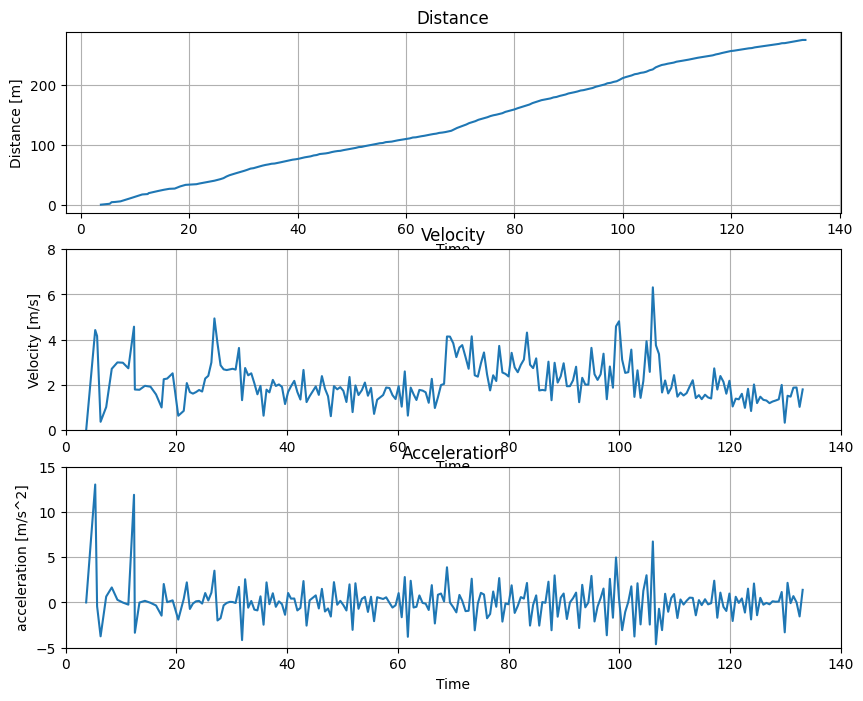

In [287]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 8))


plt.subplot(3, 1, 1)
plt.plot(gpsdata['seconds_elapsed'], gpsdata['total_distance'])
plt.grid()
plt.title('Distance')
plt.xlabel('Time')
plt.ylabel('Distance [m]')

plt.subplot(3, 1, 2)
plt.plot(gpsdata['seconds_elapsed'], gpsdata['velocity'])
#plt.legend(['Velocity from GPS'])
plt.grid()
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity [m/s]')
plt.axis([0,140,0,8])

plt.subplot(3, 1, 3)
plt.plot(gpsdata['seconds_elapsed'], gpsdata['acceleration'])
plt.grid()
plt.title('Acceleration')
plt.xlabel('Time')
plt.ylabel('acceleration [m/s^2]')
plt.axis([0,140,-5,15])




print('The average velocity is', gpsdata['velocity'].mean(), 'm/s')
#print('Traveled distance as a number is', gpsdata['total_distance'], 'm')

print('Traveled distance as a number is', gpsdata['total_distance'].iloc[-1], 'm')



      Unnamed: 0  seconds_elapsed         z         y         x  \
1              1         0.159217 -2.651466 -0.560432 -0.418557   
2              2         0.175117 -2.132024 -0.366186 -0.535990   
3              3         0.190986 -1.023350 -0.041039 -0.522485   
4              4         0.206763 -0.449766  0.229015 -0.356920   
5              5         0.222663 -0.719320  0.269587 -0.157878   
...          ...              ...       ...       ...       ...   
8441        8441       133.907827  5.114623  1.839526 -1.370973   
8442        8442       133.923635  1.925411  1.976759 -1.019807   
8443        8443       133.939474  0.877851  1.657148 -0.976474   
8444        8444       133.955343  2.747669  0.726561 -1.049844   
8445        8445       133.971151  4.901917 -0.585189 -0.953776   

      acceleration_x  acceleration_y  acceleration_z  
1           3.149423        1.365539       12.330431  
2          -7.385894       12.217033       32.670046  
3           0.851016       20.

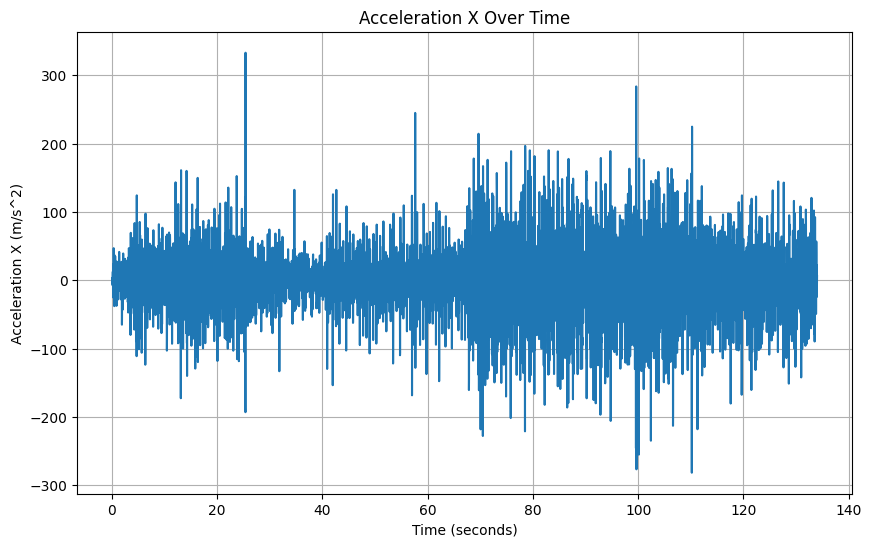

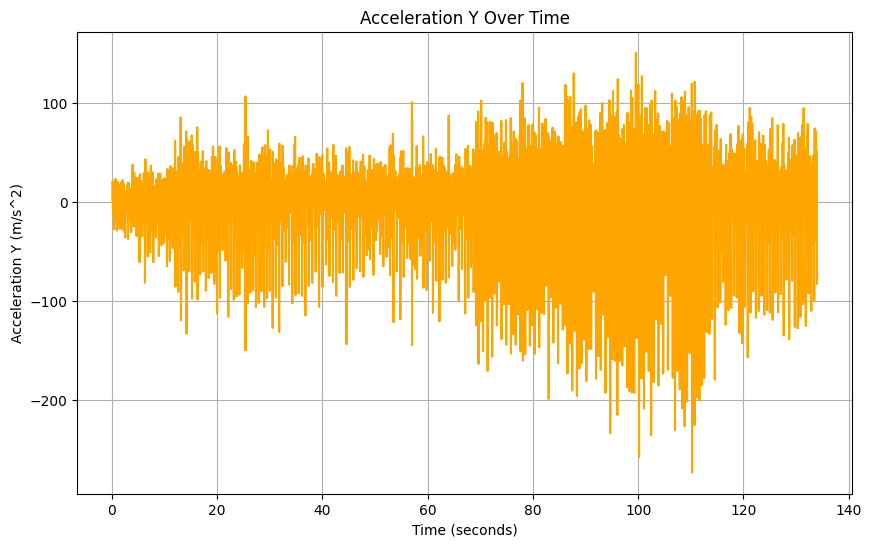

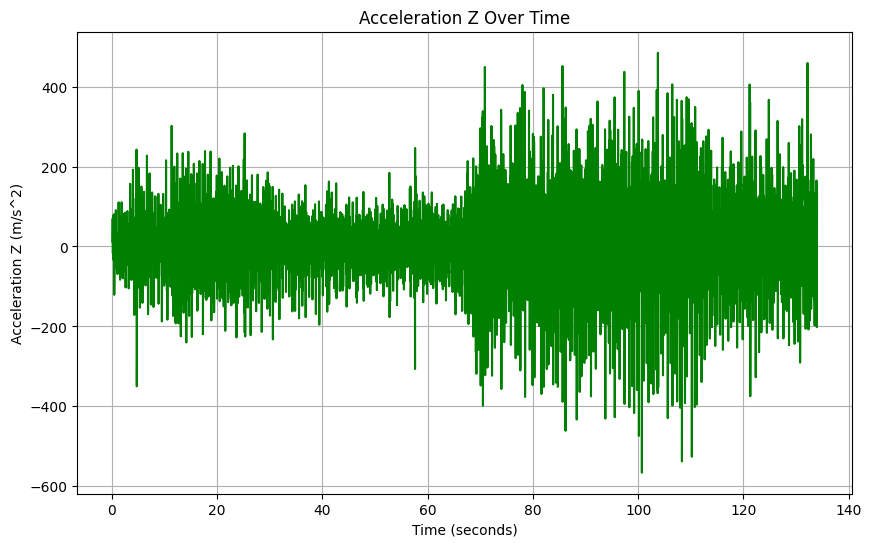

In [288]:
#import pandas as pd

# Load acceleration data
acceleration_data = pd.read_csv("acceleration_data.csv")

# Calculate acceleration components
acceleration_data['acceleration_x'] = acceleration_data['x'].diff() / acceleration_data['seconds_elapsed'].diff()
acceleration_data['acceleration_y'] = acceleration_data['y'].diff() / acceleration_data['seconds_elapsed'].diff()
acceleration_data['acceleration_z'] = acceleration_data['z'].diff() / acceleration_data['seconds_elapsed'].diff()

data['acceleration_x'] = acceleration_data['x'].diff() / acceleration_data['seconds_elapsed'].diff()
data['acceleration_y'] = acceleration_data['y'].diff() / acceleration_data['seconds_elapsed'].diff()
data['acceleration_z'] = acceleration_data['z'].diff() / acceleration_data['seconds_elapsed'].diff()

# Drop the first row which will have NaN values after differencing
acceleration_data = acceleration_data.dropna()

# Display the resulting dataframe
print(acceleration_data)

import matplotlib.pyplot as plt

# Plot acceleration component X
plt.figure(figsize=(10, 6))
plt.plot(acceleration_data['seconds_elapsed'], acceleration_data['acceleration_x'])
plt.title('Acceleration X Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration X (m/s^2)')
plt.grid(True)
plt.show()

# Plot acceleration component Y
plt.figure(figsize=(10, 6))
plt.plot(acceleration_data['seconds_elapsed'], acceleration_data['acceleration_y'], color='orange')
plt.title('Acceleration Y Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration Y (m/s^2)')
plt.grid(True)
#plt.show()

# Plot acceleration component Z
plt.figure(figsize=(10, 6))
plt.plot(acceleration_data['seconds_elapsed'], acceleration_data['acceleration_z'], color='green')
plt.title('Acceleration Z Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration Z (m/s^2)')
plt.grid(True)
plt.show()



The number of steps is 0 steps


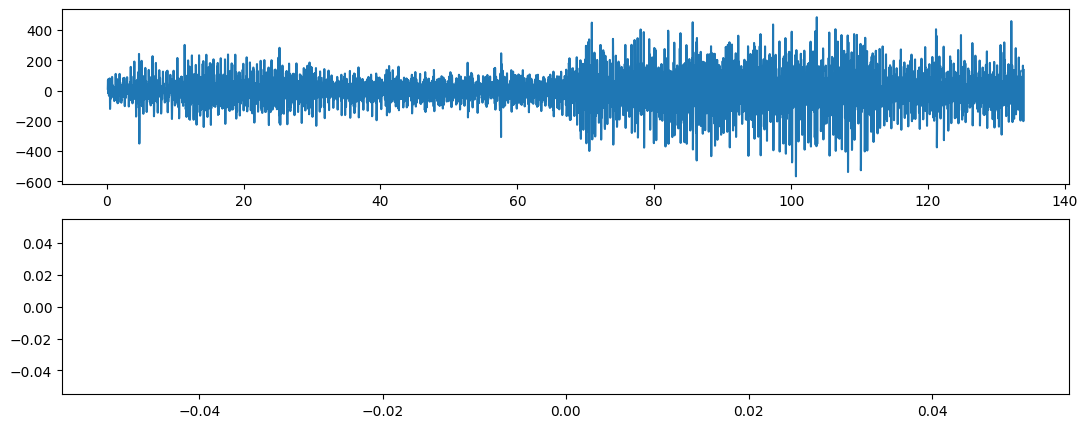

In [289]:
#filter data
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y
noisy_signal = data['acceleration_z']
time = data['seconds_elapsed']
order = 2
dt = (time[len(time)-1] - time[0])/len(time) #time is different from time_vect

fs = 1/dt # sampling rate
nyq = 0.5 * fs
cutoff_H = 1/5 # desired cutoff frequency of the filter, Hz
cutoff_L = 1/0.5 # desired cutoff frequency of the filter, Hz
#after this filter we will hane only frequencies from 1/40 and 1/5

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs,nyq, order)
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs,nyq, order)

plt.figure(figsize=(13, 5))
plt.subplot(2,1,1)
plt.plot(time, noisy_signal)
plt.subplot(2,1,2)
plt.plot(time, final_signal)

stepdata = final_signal
step = 0
for i in range(len(stepdata)-1):
    if stepdata[i]/stepdata[i+1] < 0 :
        step = step + 0.5
print('The number of steps is', step, 'steps')

In [290]:
# 7. The number of steps 
#read the data. 
import pandas as pd 
df = pd.read_csv('Acceleration_data.csv')
df.head() #check the first 5 rows
df.info() #check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8446 entries, 0 to 8445
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8446 non-null   int64  
 1   seconds_elapsed  8446 non-null   float64
 2   z                8446 non-null   float64
 3   y                8446 non-null   float64
 4   x                8446 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 330.1 KB


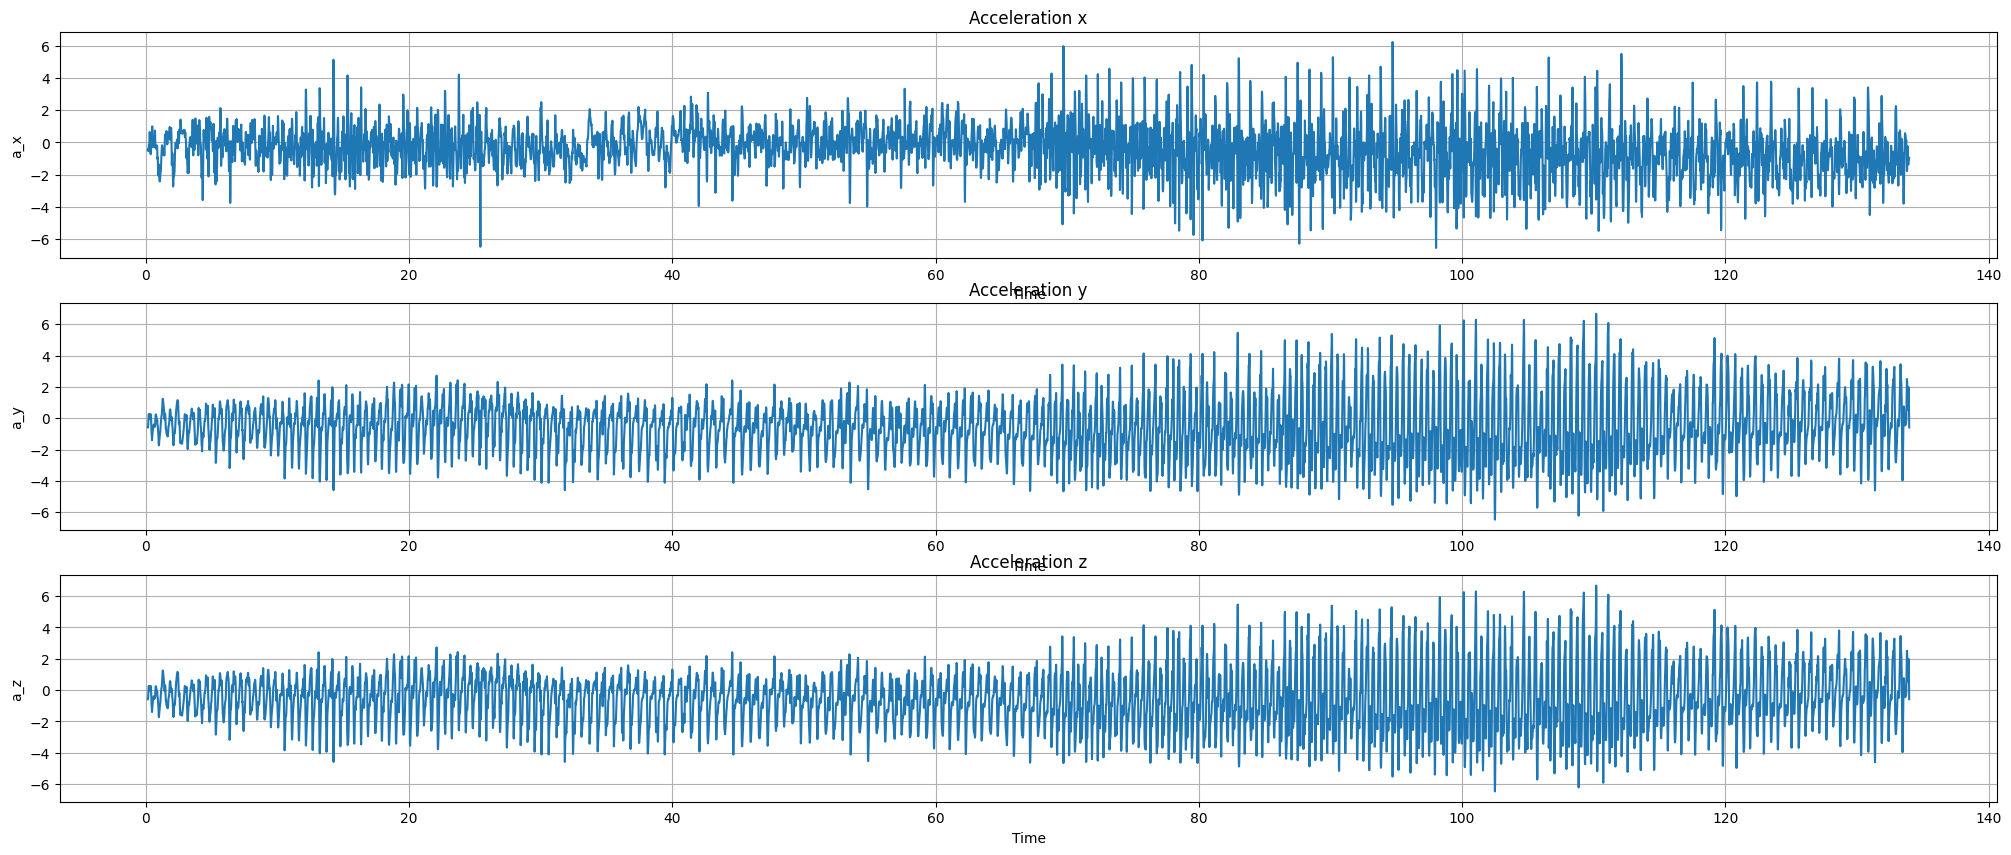

In [291]:
#make a simple graph
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10)) #set the size of the graph
plt.subplot(3,1,1) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['x']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration x') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_x') #set the y axis label

plt.subplot(3,1,2) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['y']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration y') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_y') #set the y axis label

plt.subplot(3,1,3) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['y']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration z') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_z') #set the y axis label

plt.show() #show the plot

In [292]:
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

The number of steps is 255.5 steps


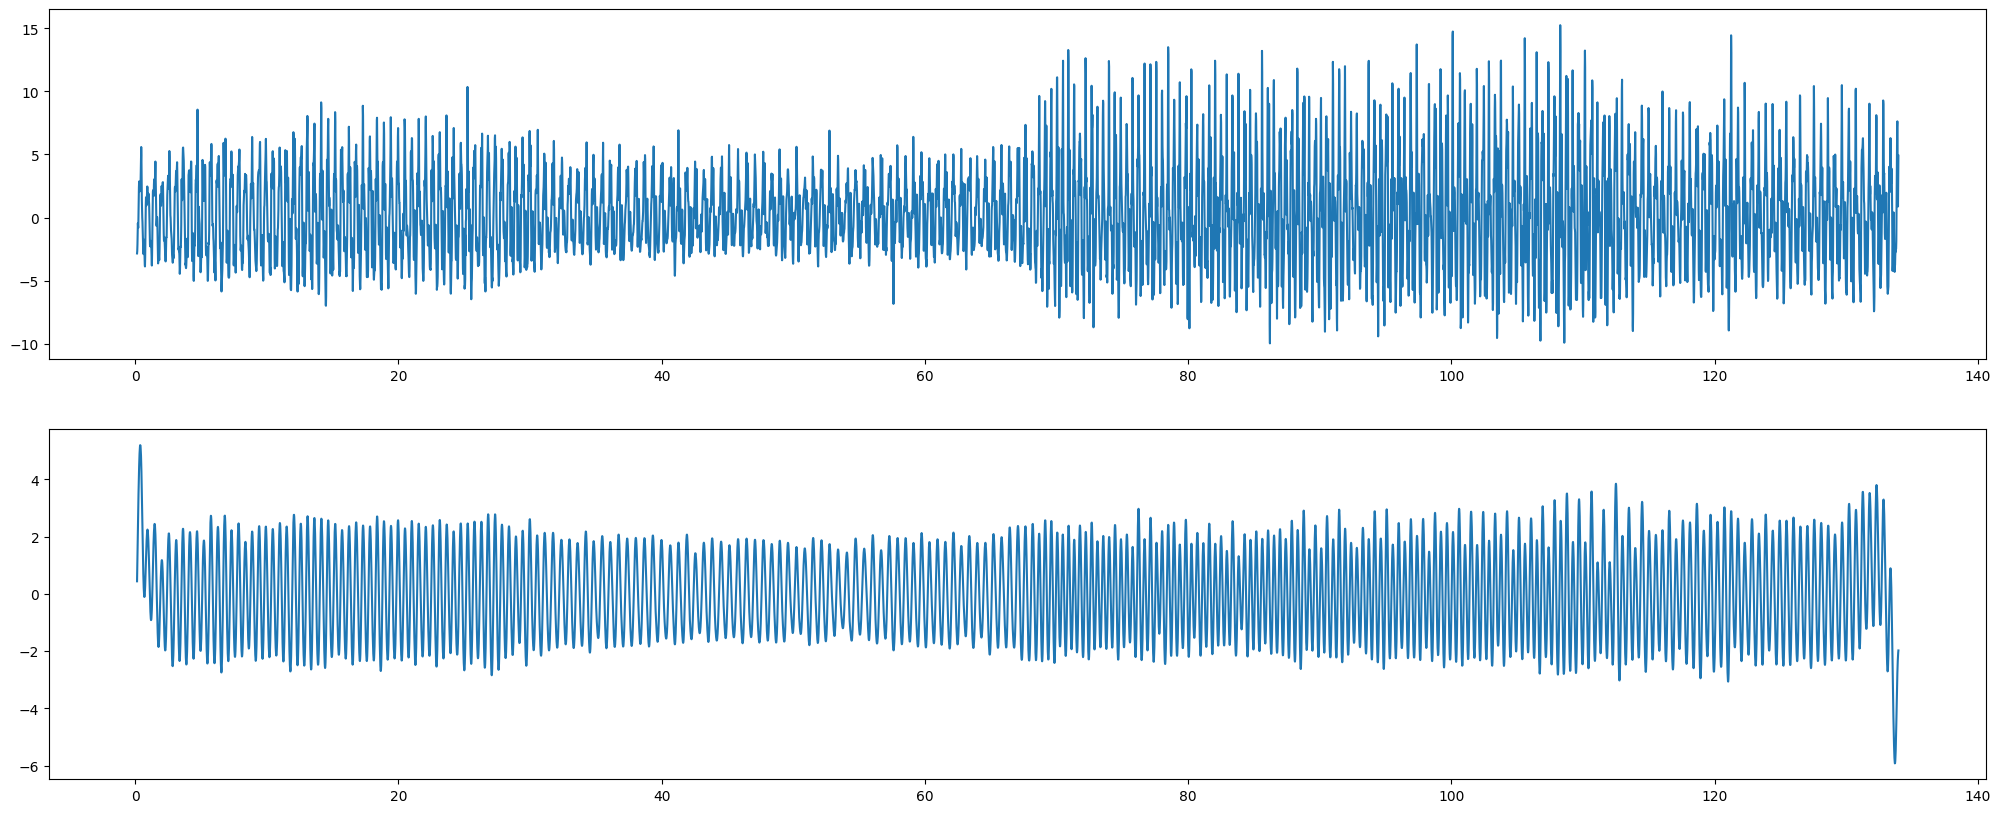

In [293]:
#filter the data
# select the components of the signal
noisy_signal = df['z'] #select the data
time = df['seconds_elapsed'] #select the time

order = 2
dt= (time[len(time) - 1] - time[0])/len(time) # time sampling interval
fs = 1/dt # sample rate, Hz
nyq = 0.5 * fs # Nyquist Frequency

cutoff_H = 1/5 # high pass cutoff frequency of the filter, Hz
cutoff_L = 1/0.5 # low pass cutoff frequency of the filter, Hz
#after this filtering we'll have only frequencies between 1/5 and 1/40 Hz

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order) #filter out high frequencies
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order) #filter out low frequencies

plt.figure(figsize=(25,10)) #set the size of the graph
plt.subplot(2,1,1) #3 rows, 1 column, 1st plot
plt.plot(time,noisy_signal)
plt.subplot(2,1,2) #3 rows, 1 column, 1st plot
plt.plot(time,final_signal)

stepdata = final_signal
step = 0
for i in range(len(stepdata)-1):
    if stepdata[i]/stepdata[i+1] < 0 :
        step = step + 0.5
print('The number of steps is', step, 'steps')